## Task-2

### Part 2.1

We are going to stick with our Business Actors vs Private Individuals (English speaking) conflict

In [1]:
from text_mining.data import get_research_dataframe

from sdm.config import get_db_connection

In [2]:
conn = get_db_connection(db_type="sqlite", db_path="D:/UU/Sem3/SDM/social_data_mining/data/twitter.db")
df = get_research_dataframe(db=conn)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26019 entries, 0 to 26018
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   account_id    26019 non-null  object
 1   tweet_text    26019 non-null  object
 2   account_type  26019 non-null  object
 3   lang          26019 non-null  object
 4   stance        25480 non-null  object
dtypes: object(5)
memory usage: 1016.5+ KB
None


,account_id,tweet_text,account_type,lang,stance
0,77254498,"""@ComposerCorner I am proud to be a #climatech...",Private individuals,en,For
1,77254498,#ActionDay ~ Blog ~ Greener Green Gifts ~ htt...,Private individuals,en,For
2,77254498,#Agnotology ~ @Ecojustice files complaint w/Co...,Private individuals,en,For
3,77254498,#AsPredicted ~ @Canada wins #FossiloftheDay ~ ...,Private individuals,en,For
4,77254498,#AusPol ~ #COP21 ~ #MentalHealth of #Australia...,Private individuals,en,For


### Part 2.2: Preprocessing

In [3]:
import re

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [4]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'https://t\.co/\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    # words = text.split()  # Tokenize
    # words = [w for w in words if w not in ENGLISH_STOP_WORDS and len(w) > 2 and 'http' not in w]  # Remove stop words
    return text

In [5]:
def tokenize_text(text):
    return word_tokenize(text)

def remove_stopwords(tokens):
    stop_words = set(stopwords.words("english"))
    return [word for word in tokens if word not in stop_words]

def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

In [6]:
df["processed_text"] = df["tweet_text"].apply(preprocess_text)
df["tokens"] = df["processed_text"].apply(tokenize_text)
df["tokens"] = df["tokens"].apply(remove_stopwords)
df["tokens"] = df["tokens"].apply(lemmatize_tokens)

df.head()

,account_id,tweet_text,account_type,lang,stance,processed_text,tokens
0,77254498,"""@ComposerCorner I am proud to be a #climatech...",Private individuals,en,For,composercorner i am proud to be a climatechang...,"[composercorner, proud, climatechange, denier,..."
1,77254498,#ActionDay ~ Blog ~ Greener Green Gifts ~ htt...,Private individuals,en,For,actionday blog greener green gifts law cu...,"[actionday, blog, greener, green, gift, law, c..."
2,77254498,#Agnotology ~ @Ecojustice files complaint w/Co...,Private individuals,en,For,agnotology ecojustice files complaint wcompet...,"[agnotology, ecojustice, file, complaint, wcom..."
3,77254498,#AsPredicted ~ @Canada wins #FossiloftheDay ~ ...,Private individuals,en,For,aspredicted canada wins fossiloftheday it ge...,"[aspredicted, canada, win, fossiloftheday, get..."
4,77254498,#AusPol ~ #COP21 ~ #MentalHealth of #Australia...,Private individuals,en,For,auspol cop mentalhealth of australian wheat ...,"[auspol, cop, mentalhealth, australian, wheat,..."


### Part 2.3: LDA, one more time...

In [7]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

In [8]:
dictionary = Dictionary(df["tokens"])
# dictionary.filter_extremes(no_below=2, no_above=0.8)
print(len(dictionary))

25619


In [9]:
corpus = [dictionary.doc2bow(tokens) for tokens in df["tokens"]]
# print(corpus[:10])

In [10]:
lda_model = LdaModel(
                corpus=corpus,
                id2word=dictionary,
                random_state=42,
                passes=10,
                iterations=50
            )

In [11]:
print(lda_model.print_topics())

[(83, '0.217*"lpaa" + 0.128*"build" + 0.104*"washington" + 0.103*"write" + 0.102*"sink" + 0.081*"rt" + 0.069*"lpaa_live" + 0.038*"cop" + 0.015*"damage" + 0.010*"thought"'), (81, '0.475*"un" + 0.120*"earthtoparis" + 0.072*"impact" + 0.055*"cop" + 0.042*"air" + 0.033*"climatechange" + 0.026*"cleanenergy" + 0.024*"public" + 0.014*"transformation" + 0.010*"study"'), (58, '0.277*"du" + 0.097*"launch" + 0.060*"reach" + 0.058*"htt" + 0.057*"speech" + 0.045*"helping" + 0.044*"research" + 0.032*"speaks" + 0.028*"idea" + 0.016*"took"'), (62, '0.232*"take" + 0.179*"last" + 0.125*"city" + 0.074*"amp" + 0.065*"low" + 0.048*"speaking" + 0.044*"better" + 0.027*"cop" + 0.022*"everything" + 0.019*"place"'), (93, '0.125*"initiative" + 0.111*"cop" + 0.110*"sector" + 0.095*"agenda" + 0.070*"private" + 0.054*"side" + 0.050*"event" + 0.038*"forward" + 0.036*"resource" + 0.031*"adp"'), (29, '0.249*"planet" + 0.156*"business" + 0.098*"transition" + 0.080*"cop" + 0.071*"adapt" + 0.061*"help" + 0.045*"rt" + 0.0

In [12]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [13]:
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)

pyLDAvis.display(lda_vis)

I want to test the above with a different preprocessing function, so LDA one more time...

In [14]:
def aliter_preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'https://t\.co/\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    words = text.split()  # Tokenize
    words = [w for w in words if w not in ENGLISH_STOP_WORDS and len(w) > 2 and 'http' not in w]  # Remove stop words
    return words

In [15]:
test_df = get_research_dataframe(db=conn)

test_df["processed_text"] = test_df["tweet_text"].apply(aliter_preprocess_text)
test_df.head()

,account_id,tweet_text,account_type,lang,stance,processed_text
0,77254498,"""@ComposerCorner I am proud to be a #climatech...",Private individuals,en,For,"[composercorner, proud, climatechange, denier,..."
1,77254498,#ActionDay ~ Blog ~ Greener Green Gifts ~ htt...,Private individuals,en,For,"[actionday, blog, greener, green, gifts, law, ..."
2,77254498,#Agnotology ~ @Ecojustice files complaint w/Co...,Private individuals,en,For,"[agnotology, ecojustice, files, complaint, wco..."
3,77254498,#AsPredicted ~ @Canada wins #FossiloftheDay ~ ...,Private individuals,en,For,"[aspredicted, canada, wins, fossiloftheday, ge..."
4,77254498,#AusPol ~ #COP21 ~ #MentalHealth of #Australia...,Private individuals,en,For,"[auspol, cop, mentalhealth, australian, wheat,..."


In [16]:
test_dictionary = Dictionary(test_df["processed_text"])
test_dictionary.filter_extremes(no_below=2, no_above=0.8)
print(len(test_dictionary))

12256


In [17]:
test_corpus = [test_dictionary.doc2bow(text) for text in test_df["processed_text"]]

In [18]:
test_lda_model = LdaModel(
                corpus=test_corpus,
                id2word=test_dictionary,
                random_state=42,
                passes=10,
                iterations=50,
                num_topics=50
            )

In [19]:
test_lda_vis = gensimvis.prepare(test_lda_model, test_corpus, test_dictionary)

pyLDAvis.display(test_lda_vis)

### Part 2.4: BTM

In [20]:
import bitermplus as btm
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
test_df["text"] = test_df["processed_text"].apply(lambda x: " ".join(x))

test_df.head()

,account_id,tweet_text,account_type,lang,stance,processed_text,text
0,77254498,"""@ComposerCorner I am proud to be a #climatech...",Private individuals,en,For,"[composercorner, proud, climatechange, denier,...",composercorner proud climatechange denier yes ...
1,77254498,#ActionDay ~ Blog ~ Greener Green Gifts ~ htt...,Private individuals,en,For,"[actionday, blog, greener, green, gifts, law, ...",actionday blog greener green gifts law culture...
2,77254498,#Agnotology ~ @Ecojustice files complaint w/Co...,Private individuals,en,For,"[agnotology, ecojustice, files, complaint, wco...",agnotology ecojustice files complaint wcompeti...
3,77254498,#AsPredicted ~ @Canada wins #FossiloftheDay ~ ...,Private individuals,en,For,"[aspredicted, canada, wins, fossiloftheday, ge...",aspredicted canada wins fossiloftheday gets be...
4,77254498,#AusPol ~ #COP21 ~ #MentalHealth of #Australia...,Private individuals,en,For,"[auspol, cop, mentalhealth, australian, wheat,...",auspol cop mentalhealth australian wheat farme...


In [22]:
texts = test_df["text"].str.strip().to_list()
print(texts[:3])

['composercorner proud climatechange denier yes paul yes cdnpoli cop psychology humour tlot tcot design', 'actionday blog greener green gifts law culture cdnpoli cop climatechange consumerism psychology', 'agnotology ecojustice files complaint wcompetition bureau climate deniers friendsoscience cop cdnpoli']


In [23]:
X, vocabulary, vocab_dict = btm.get_words_freqs(texts)

In [24]:
# print(X[:3])
# print(vocabulary[:3])
# print(vocab_dict.items())

In [25]:
docs_vec = btm.get_vectorized_docs(texts, vocabulary)

print(docs_vec[:3])

[array([ 4693, 18634,  4128,  6111, 25911, 17346, 25911,  3460,  5070,
       18728, 11107, 23360, 22880,  6225]), array([  258,  2515, 10170, 10148,  9822, 13424,  5522,  3460,  5070,
        4128,  4920, 18728]), array([  576,  7249,  8796,  4670, 25250,  2945,  4085,  6112,  9356,
        5070,  3460])]


In [26]:
biterms = btm.get_biterms(docs_vec)

print(biterms[:3])

[[[4693, 18634], [4128, 4693], [4693, 6111], [4693, 25911], [4693, 17346], [4693, 25911], [3460, 4693], [4693, 5070], [4693, 18728], [4693, 11107], [4693, 23360], [4693, 22880], [4693, 6225], [4128, 18634], [6111, 18634], [18634, 25911], [17346, 18634], [18634, 25911], [3460, 18634], [5070, 18634], [18634, 18728], [11107, 18634], [18634, 23360], [18634, 22880], [6225, 18634], [4128, 6111], [4128, 25911], [4128, 17346], [4128, 25911], [3460, 4128], [4128, 5070], [4128, 18728], [4128, 11107], [4128, 23360], [4128, 22880], [4128, 6225], [6111, 25911], [6111, 17346], [6111, 25911], [3460, 6111], [5070, 6111], [6111, 18728], [6111, 11107], [6111, 23360], [6111, 22880], [6111, 6225], [17346, 25911], [25911, 25911], [3460, 25911], [5070, 25911], [18728, 25911], [11107, 25911], [23360, 25911], [22880, 25911], [6225, 25911], [17346, 25911], [3460, 17346], [5070, 17346], [17346, 18728], [11107, 17346], [17346, 23360], [17346, 22880], [6225, 17346], [3460, 25911], [5070, 25911], [18728, 25911], [

In [27]:
n_topics = 50
btm_model = btm.BTM(X, vocabulary, seed=42, T=n_topics, M=20, alpha=50/n_topics, beta=0.01)
btm_model.fit(biterms, iterations=100)

100%|██████████| 100/100 [00:32<00:00,  3.11it/s]


In [28]:
p_zd = btm_model.transform(docs_vec)

100%|██████████| 26019/26019 [00:00<00:00, 89187.93it/s]


In [29]:
perplexity = btm_model.perplexity_
coherence = btm_model.coherence_
print(f"Perplexity = {perplexity}\nCoherence = {coherence}")

Perplexity = 359.96058116336104
Coherence = [-795.8004339  -710.7349696  -794.49588611 -505.00173067 -749.37480898
 -741.52494597 -734.16997343 -669.59536554 -678.5833058  -640.00438769
 -667.8634716  -626.30592175 -662.40034562 -528.41181266 -762.38404998
 -550.68186812 -729.02085902 -796.30765382 -690.71111284 -744.11429154
 -551.16135051 -713.33408404 -654.09164145 -686.05956202 -695.50452102
 -671.749194   -727.98465038 -674.72352423 -710.46856957 -517.82548199
 -697.51179071 -583.59538582 -623.80485373 -731.18661931 -771.3924257
 -651.14099647 -614.32163783 -699.24840726 -773.11476107 -756.52419712
 -809.53131928 -707.94328303 -756.2034258  -699.49901585 -702.64868576
 -684.46348331 -807.58921015 -675.6146712  -678.005167   -653.44894218]


In [30]:
import tmplot as tmp
tmp.report(model=btm_model, docs=texts)

### Part 2.5: Embeddings

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [34]:
embed_df = df.copy()
embed_df.head()

,account_id,tweet_text,account_type,lang,stance,processed_text,tokens
0,77254498,"""@ComposerCorner I am proud to be a #climatech...",Private individuals,en,For,composercorner i am proud to be a climatechang...,"[composercorner, proud, climatechange, denier,..."
1,77254498,#ActionDay ~ Blog ~ Greener Green Gifts ~ htt...,Private individuals,en,For,actionday blog greener green gifts law cu...,"[actionday, blog, greener, green, gift, law, c..."
2,77254498,#Agnotology ~ @Ecojustice files complaint w/Co...,Private individuals,en,For,agnotology ecojustice files complaint wcompet...,"[agnotology, ecojustice, file, complaint, wcom..."
3,77254498,#AsPredicted ~ @Canada wins #FossiloftheDay ~ ...,Private individuals,en,For,aspredicted canada wins fossiloftheday it ge...,"[aspredicted, canada, win, fossiloftheday, get..."
4,77254498,#AusPol ~ #COP21 ~ #MentalHealth of #Australia...,Private individuals,en,For,auspol cop mentalhealth of australian wheat ...,"[auspol, cop, mentalhealth, australian, wheat,..."


In [35]:
embed_df = embed_df.dropna(subset=["tweet_text"]).drop_duplicates(subset=["tweet_text"])
texts_for_embed = embed_df["tweet_text"].str.strip().to_list()
print(len(texts_for_embed))
print(texts_for_embed[:3])

24457
['"@ComposerCorner I am proud to be a #climatechange denier!". Yes U R Paul, yes U R! #CdnPoli #COP21 #Psychology #Humour #TLOT #TCOT #Design', '#ActionDay ~ Blog ~ Greener Green Gifts  ~ https://t.co/O2F6tQx82H #Law #Culture #CdnPoli #COP21 #ClimateChange #Consumerism #Psychology', '#Agnotology ~ @Ecojustice files complaint w/Competition Bureau Vs. #climate deniers @FriendsOScience https://t.co/gp02J0JuXv #COP21 #CdnPoli']


In [36]:
stmodel = SentenceTransformer('all-MiniLM-L6-v2')

embeddings = stmodel.encode(texts_for_embed, show_progress_bar=True)

print(embeddings.shape)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

d:\UU\Sem3\SDM\social_data_mining\.venv\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\anand\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/765 [00:00<?, ?it/s]

(24457, 384)


d:\UU\Sem3\SDM\social_data_mining\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


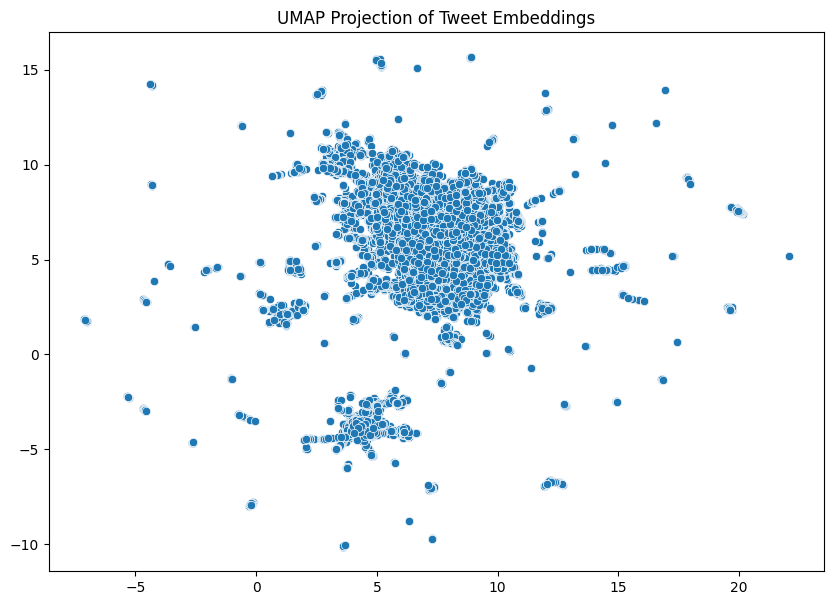

In [37]:
reducer = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
reduced_embeddings = reducer.fit_transform(embeddings)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1])
plt.title("UMAP Projection of Tweet Embeddings")
plt.show()

In [57]:
range_n_clusters = range(2, 11)
best_k = None
best_score = -1

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(reduced_embeddings)
    score = silhouette_score(reduced_embeddings, cluster_labels)
    print(f"Clusters: {n_clusters}, Silhouette Score: {score:.4f}")
    
    if score > best_score:
        best_score = score
        best_k = n_clusters
        
print(f"Best k = {best_k}, Best score = {best_score:.4f}")

Clusters: 2, Silhouette Score: 0.5451
Clusters: 3, Silhouette Score: 0.4984
Clusters: 4, Silhouette Score: 0.3867
Clusters: 5, Silhouette Score: 0.4204
Clusters: 6, Silhouette Score: 0.3942
Clusters: 7, Silhouette Score: 0.3799
Clusters: 8, Silhouette Score: 0.3974
Clusters: 9, Silhouette Score: 0.3991
Clusters: 10, Silhouette Score: 0.4075
Best k = 2, Best score = 0.5451


In [40]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(reduced_embeddings)

embed_df["cluster"] = clusters
print(embed_df[['tweet_text', 'cluster', 'account_type']].head())

                                          tweet_text  cluster  \
0  "@ComposerCorner I am proud to be a #climatech...        0   
1  #ActionDay ~ Blog ~ Greener Green Gifts  ~ htt...        0   
2  #Agnotology ~ @Ecojustice files complaint w/Co...        0   
3  #AsPredicted ~ @Canada wins #FossiloftheDay ~ ...        0   
4  #AusPol ~ #COP21 ~ #MentalHealth of #Australia...        0   

          account_type  
0  Private individuals  
1  Private individuals  
2  Private individuals  
3  Private individuals  
4  Private individuals  


In [42]:
print(embed_df['cluster'].value_counts())

cluster
0    20041
1     4416
Name: count, dtype: int64


In [43]:
print(embed_df["account_type"].value_counts())

account_type
Private individuals    15796
Business actors         8661
Name: count, dtype: int64


In [45]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
def get_top_words_per_cluster(texts, clusters, n_words):
    vectorizer = TfidfVectorizer(stop_words="english")
    tfidf_matrix = vectorizer.fit_transform(texts)
    terms = vectorizer.get_feature_names_out()
    
    top_words = {}
    for cluster_id in set(clusters):
        indices = np.where(clusters == cluster_id)[0]
        cluster_tfidf = tfidf_matrix[indices].mean(axis=0)
        sorted_indices = np.argsort(cluster_tfidf.A1)[::-1][:n_words]
        top_words[cluster_id] = [terms[i] for i in sorted_indices]
        
    return top_words

In [50]:
preprocessed_text = [preprocess_text(text) for text in texts_for_embed]
top_words = get_top_words_per_cluster(preprocessed_text, clusters, n_words=20)

for cluster, words in top_words.items():
    print(f"Cluster {cluster}: {', '.join(words)}")

Cluster 0: cop, rt, climate, paris, climatechange, amp, energy, change, unfccc, world, sassoui, action, global, agreement, live, https, need, today, deal, new
Cluster 1: la, sassoui, le, cop, nrcg, les, et, en, opchempba, nguesso, au, rt, du, pour, denis, sassou, nous, sera, planète, négociations


## Conclusions

Our clustering gives us two clusters. In essence, it is observed that the clusters are mainly divided on tweets containing english text and those with text from other languages even though the users have been annotated as "English" speakers.

In [54]:
embed_df[embed_df["cluster"] == 0].to_csv("cluster0.csv", index=False)

In [53]:
embed_df[embed_df["cluster"] == 1].to_csv("cluster1.csv", index=False)

In [58]:
test_embed_df = embed_df.copy()
test_texts_for_embed = test_embed_df["tweet_text"].str.strip().to_list()
test_embeddings = stmodel.encode(test_texts_for_embed, show_progress_bar=True)
print(test_embeddings.shape)

Batches:   0%|          | 0/765 [00:00<?, ?it/s]

(24457, 384)


In [61]:
from sklearn.preprocessing import normalize

normalized_embeddings = normalize(reduced_embeddings, norm='l2', axis=1)

In [62]:
test_range_n_clusters = range(2, 11)
test_best_k = None
test_best_score = -1

for n_clusters in test_range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(normalized_embeddings)
    score = silhouette_score(normalized_embeddings, cluster_labels)
    print(f"Clusters: {n_clusters}, Silhouette Score: {score:.4f}")
    
    if score > test_best_score:
        test_best_score = score
        test_best_k = n_clusters
        
print(f"Best k = {test_best_k}, Best score = {test_best_score:.4f}")

Clusters: 2, Silhouette Score: 0.7169
Clusters: 3, Silhouette Score: 0.5619
Clusters: 4, Silhouette Score: 0.5786
Clusters: 5, Silhouette Score: 0.5490
Clusters: 6, Silhouette Score: 0.5526
Clusters: 7, Silhouette Score: 0.5493
Clusters: 8, Silhouette Score: 0.5276
Clusters: 9, Silhouette Score: 0.5335
Clusters: 10, Silhouette Score: 0.5338
Best k = 2, Best score = 0.7169


In [63]:
test_kmeans = KMeans(n_clusters=test_best_k, random_state=42)
test_clusters = test_kmeans.fit_predict(normalized_embeddings)

test_embed_df["cluster"] = test_clusters

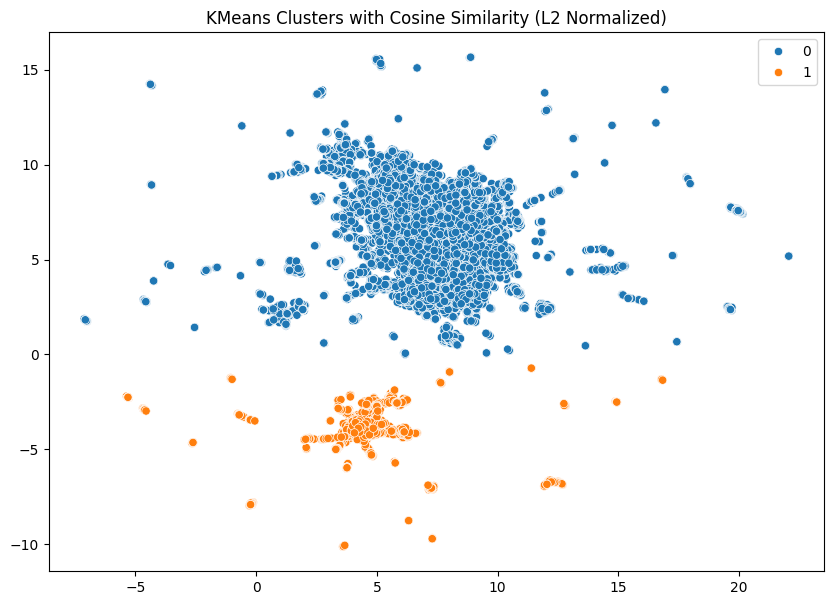

In [129]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=test_clusters, palette="tab10")
plt.title("KMeans Clusters with Cosine Similarity (L2 Normalized)")
plt.show()

Trying hdbscan

In [65]:
import hdbscan

In [195]:
hdbscan_clusterer = hdbscan.HDBSCAN(
    min_cluster_size=300,
    min_samples=15,
    metric="euclidean",
    cluster_selection_method="eom",
    prediction_data=True
)

hdb_clusters = hdbscan_clusterer.fit_predict(reduced_embeddings)

In [196]:
embed_df["hdb_cluster"] = hdb_clusters

print(embed_df[['tweet_text', 'hdb_cluster']].head())

                                          tweet_text  hdb_cluster
0  "@ComposerCorner I am proud to be a #climatech...            4
1  #ActionDay ~ Blog ~ Greener Green Gifts  ~ htt...            4
2  #Agnotology ~ @Ecojustice files complaint w/Co...            6
3  #AsPredicted ~ @Canada wins #FossiloftheDay ~ ...            6
4  #AusPol ~ #COP21 ~ #MentalHealth of #Australia...            6


In [197]:
print(embed_df['hdb_cluster'].value_counts())

hdb_cluster
 6    16112
-1     3659
 1     2479
 4      668
 2      469
 5      404
 0      361
 3      305
Name: count, dtype: int64


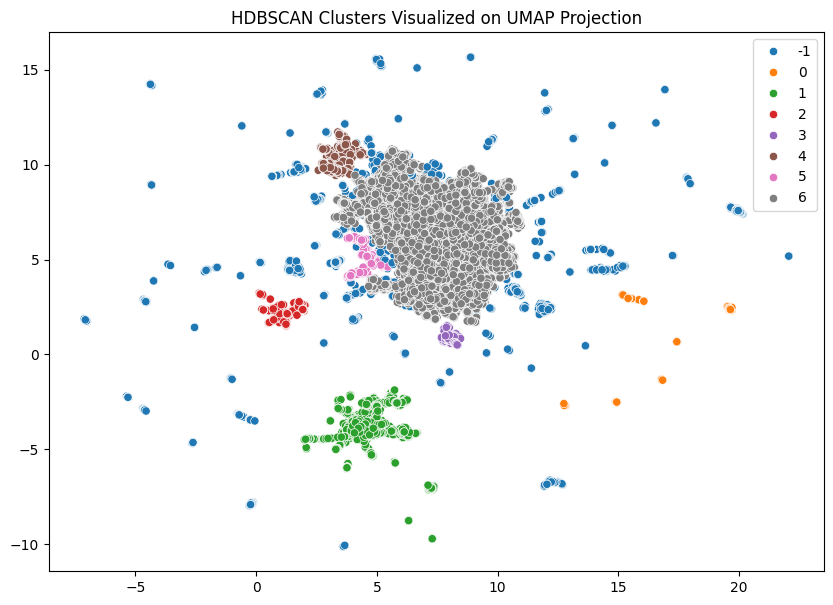

In [198]:
# Fit HDBSCAN
# labels = hdbscan_clusterer.fit_predict(reduced_embeddings)

# Plot UMAP projection with HDBSCAN clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=reduced_embeddings[:, 0],
    y=reduced_embeddings[:, 1],
    hue=hdb_clusters,
    palette="tab10",
    legend="full"
)
plt.title("HDBSCAN Clusters Visualized on UMAP Projection")
plt.show()

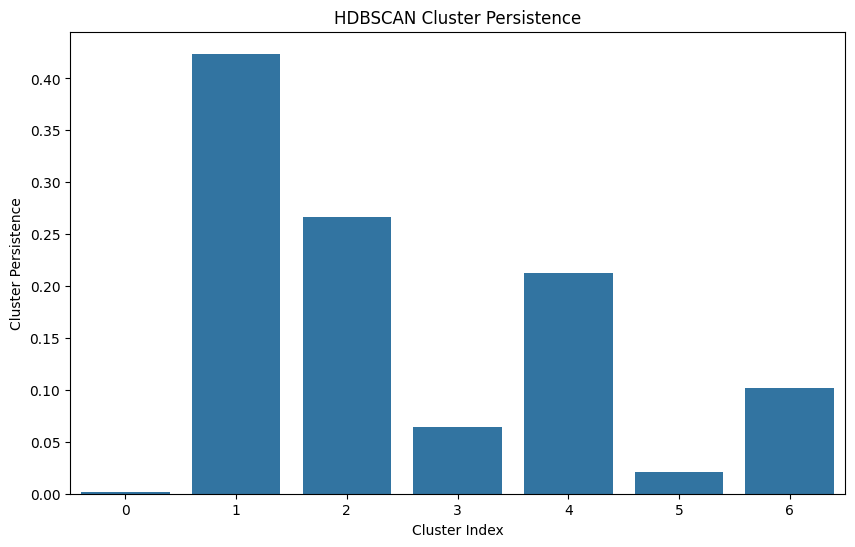

In [199]:
persistence = hdbscan_clusterer.cluster_persistence_
# Plot cluster persistence
plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(len(persistence))), y=persistence)
plt.xlabel("Cluster Index")
plt.ylabel("Cluster Persistence")
plt.title("HDBSCAN Cluster Persistence")
plt.show()

In [200]:
hdb_top_words = get_top_words_per_cluster(preprocessed_text, hdb_clusters, n_words=20)

for cluster, words in hdb_top_words.items():
    print(f"Cluster {cluster}: {', '.join(words)}")

Cluster 0: franc, direct, sassou, nguesso, et, nrcg, sassoui, future, cop, geoengineering, climateengineering, guarantee, deserves, gtgt, endingdec, weatherderivatives, daytwitterstorm, earth, children, climategate
Cluster 1: la, le, les, et, cop, en, sassoui, rt, nrcg, nous, sera, pour, négociations, quel, dénouement, verrons, suivons, des, du, accord
Cluster 2: opchempba, opchemtrails, climateengineering, exposingclimategate, geoengineering, chemtrails, cop, copparis, weatherderivatives, earth, research, geoengineered, death, agenda, amp, inform, story, chemtrail, srm, breaking
Cluster 3: ban, kimoon, rt, cop, moon, usafricabf, blog, un_spokesperson, ki, leaders, world, tells, chief, paris, sg, kimoons, calls, unsg, says, amp
Cluster 4: cdnpoli, design, nuclear, green, climatechange, eco, lt, cop, fresh, science, bustthemyth, blog, ocnuke, sealevel, sea, seeing, nonukes, level, math, climate
Cluster 5: bold, taking, cop, action, fossiloftheday, killerpalm, rt, company, climate, saudi

In [203]:
embed_df[embed_df["hdb_cluster"] == 2]['tweet_text'].head()

17076    "Chemical trails" — How They Affect You and Wh...
17077    "Chemtrails" Timelapse the EPA Said Was So Abn...
17094    #GeoEngineering Related Patents https://t.co/n...
17095    . # Chemtrails r in alle Richtungen https://t....
17098    .#0p6d #OpWeb8 #OpChemtrails the rabbit hole i...
Name: tweet_text, dtype: object